In [1]:
# For numerical computing and data manipulation
import numpy as np
import pandas as pd

In [2]:
pwd

'C:\\Users\\iamni\\Dropbox\\Nihar\\Misc\\Data Visualizer\\Python'

# Data onboarding and cleaning

### Read the data

In [3]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', index_col='location')
# df = pd.read_csv('..\Data\owid-covid-data.csv',index_col='location')

### Removing unwanted dates

In [4]:
import datetime as dt
now = dt.date.today()
end_date = now.strftime("%Y-%m-%d")

start_date = now - dt.timedelta(days=30)
start_date = start_date.strftime("%Y-%m-%d")
# start_date = '2020-09-01'
# start_date = '2020-01-24'

date_range = (df['date'] >= start_date) # & (data_import['date'] <= end_date)

In [5]:
df = df.loc[date_range]

# df

### Removing unwanted countries

In [6]:
countries = []
for country in df.index:
    if (country != 'International') & (country != 'World'):
        if country not in countries:
            countries.append(country)
            
# countries

In [7]:
df = df.loc[countries, :]

# df

### Sorting by Highest New Cases and Highest New Deaths

In [8]:
df_today = (df['date'] == max(df.date))
df_today = df.loc[df_today]

# df_today

In [9]:
df_today = df_today.sort_values(by='new_cases', ascending=False)
df_new_cases = df_today.head(8)

df_new_cases.index

Index(['United States', 'India', 'United Kingdom', 'France', 'Brazil',
       'Argentina', 'Russia', 'Italy'],
      dtype='object', name='location')

In [10]:
df_new_deaths = df_today.sort_values(by='new_deaths', ascending=False)
df_new_deaths = df_new_deaths.head(8)

df_new_deaths.index

Index(['United States', 'India', 'Brazil', 'Mexico', 'Argentina', 'Russia',
       'Iran', 'Colombia'],
      dtype='object', name='location')

### Keeping unique countries with highest new cases and highest new deaths

In [11]:
countries = []
for country in df_today.index:
    if (country in df_new_deaths.index) | (country in df_new_cases.index):
    # if (country.isin(df_new_deaths.index)) | (country.isin(df_new_cases.index)):
        countries.append(country)

len(countries)

11

In [12]:
df = df.loc[countries, :]

# df

In [13]:
# Save data file
df.to_csv('../Tableau/tableau_data.csv')

In [14]:
plot_data = df[['date','total_cases','new_cases','total_deaths','new_deaths']]
plot_data

,date,total_cases,new_cases,total_deaths,new_deaths
location,,,,,
United States,2020-09-23,6896274.0,38307.0,200807.0,926.0
United States,2020-09-24,6934204.0,37930.0,201909.0,1102.0
United States,2020-09-25,6978417.0,44213.0,202810.0,901.0
United States,2020-09-26,7033430.0,55013.0,203774.0,964.0
United States,2020-09-27,7078798.0,45368.0,204497.0,723.0
...,...,...,...,...,...
Iran,2020-10-18,526490.0,4103.0,30123.0,253.0
Iran,2020-10-19,530380.0,3890.0,30375.0,252.0
Iran,2020-10-20,534631.0,4251.0,30712.0,337.0


# Plotting

### Formatting data

In [15]:
plot_date=[]
for dates in plot_data['date']:
    if dates not in plot_date:
        plot_date.append(dates)
# plot_date

In [16]:
num_of_data_points = plot_data.index.value_counts()
num_of_data_points

Brazil            30
Mexico            30
Argentina         30
India             30
Italy             30
France            30
Colombia          30
United Kingdom    30
Iran              30
United States     30
Russia            30
Name: location, dtype: int64

In [17]:
dic_new_cases={}
for i in range(len(countries)):
    dic_new_cases[i] = plot_data.loc[countries[i], ['date','new_cases']]

# dic_new_cases


# df_india = plot_data.loc['India', :]
# df_us = plot_data.loc['United States', :]

# df_india_new_cases = df_india['new_cases']
# df_india_new_deaths = df_india['new_deaths']

# df_us_new_cases = df_us['new_cases']
# df_us_new_deaths = df_us['new_deaths']

In [18]:
dic_new_deaths={}
for i in range(len(countries)):
    dic_new_deaths[i] = plot_data.loc[countries[i], ['date','new_deaths']]
    
# dic_new_deaths

In [19]:
chart_title = 'Countries with Highest New Cases   (as of '+str(max(plot_date))+')'

### Plot (finally!)

In [20]:
import matplotlib.pyplot as plt

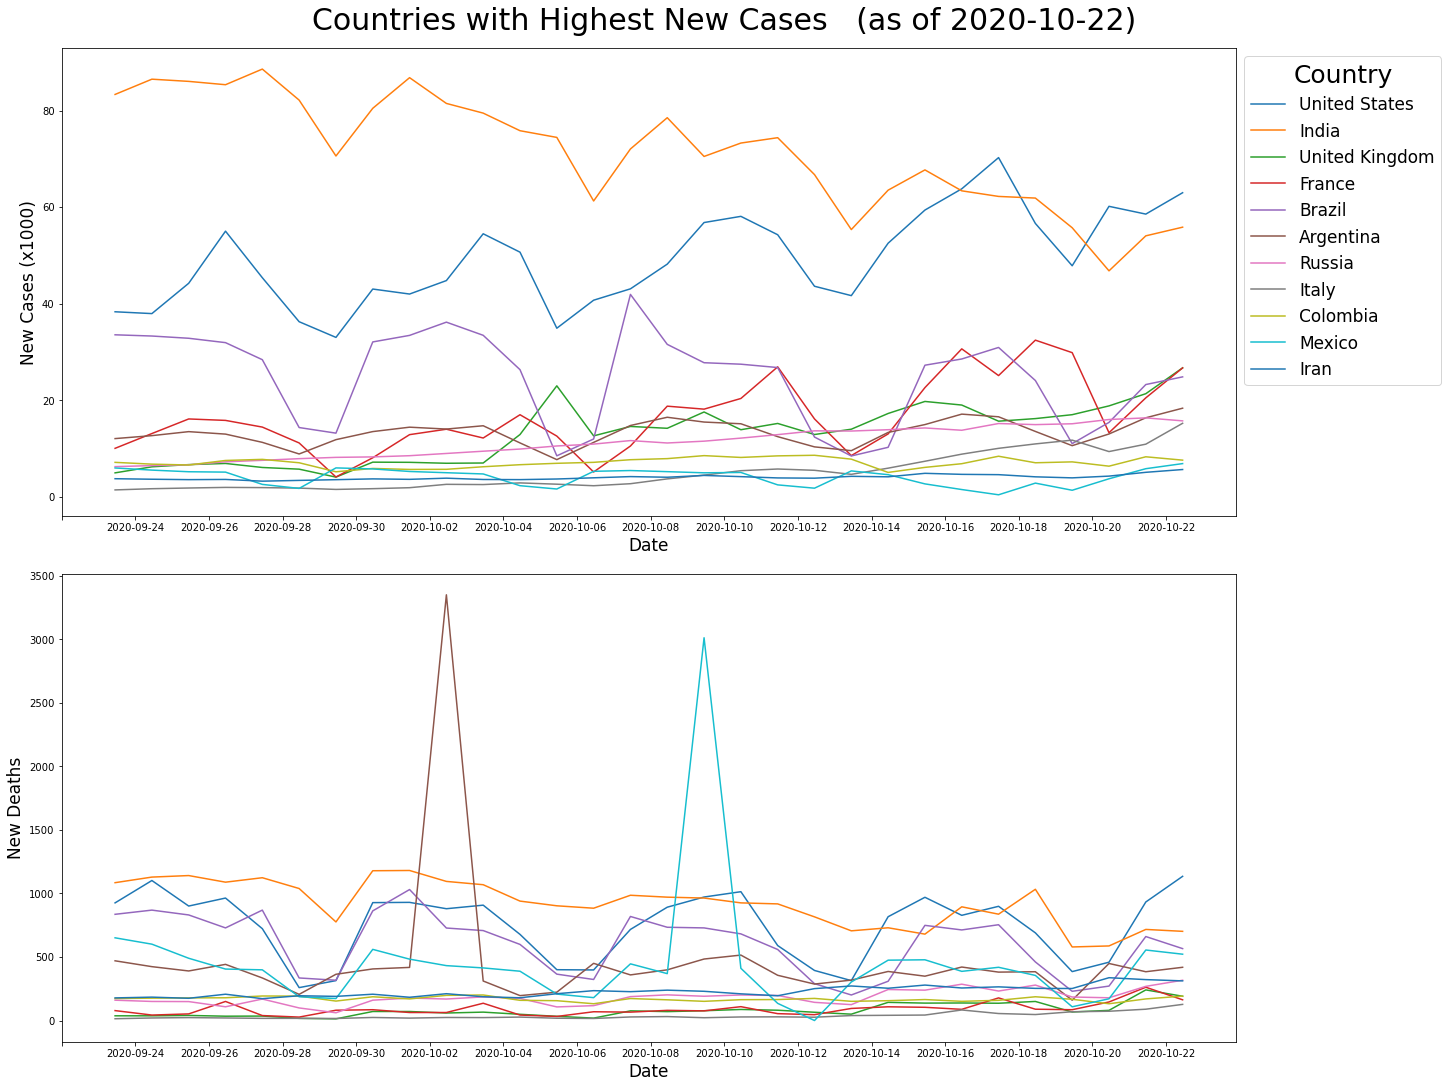

In [21]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(20,15), constrained_layout=True)
f.suptitle(chart_title, fontsize=30)

for x in range(len(countries)):
    ax1.plot(plot_date, dic_new_cases[x]['new_cases']/1000, label=countries[x])
# ax1.plot(plot_date, df_india_new_cases/1000, label='India')
# ax1.plot(plot_date, df_us_new_cases/1000, label='US')
ax1.set_xlabel('Date', fontsize=17)
ax1.set_ylabel('New Cases (x1000)', fontsize=17)
# ax1.set_title('New Cases over time', fontsize=20)
ax1.legend(bbox_to_anchor=(1, 1), fontsize=17, title="Country", title_fontsize=25)

for x in range(len(countries)):
    ax2.plot(plot_date, dic_new_deaths[x]['new_deaths'], label=countries[x])
# ax2.plot(plot_date, df_india_new_deaths, label='India')
# ax2.plot(plot_date, df_us_new_deaths, label='US')
ax2.set_xlabel('Date', fontsize=17)
ax2.set_ylabel('New Deaths', fontsize=17)
# ax2.set_title('New Deaths over time', fontsize=20)

start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 2))
ax2.xaxis.set_ticks(np.arange(start, end, 2))

# plt.subplots_adjust(hspace=0.4)
plt.show()

In [22]:
f.savefig('covid_plot.png', dpi=300)

# State Data

In [23]:
df_us = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv', index_col='state')

In [24]:
calc_date = df_us.date.unique()[-2]
calc_date_range = (df_us['date'] >= calc_date)

df_us = df_us.loc[calc_date_range]

In [25]:
df_us = df_us.sort_values(by=['state','date'])

df_us['new_cases'] = 0
df_us = df_us[df_us.columns[~df_us.columns.isin(['fips'])]]

In [26]:
for d in range(1,len(df_us.index),1):
    if (d % 2) != 0:
        df_us.iat[d,3] = max(0, df_us.iat[d,1] - df_us.iat[d-1,1])
df_us

,date,cases,deaths,new_cases
state,,,,
Alabama,2020-10-21,175674,2828,0
Alabama,2020-10-22,177064,2843,1390
Alaska,2020-10-21,12559,64,0
Alaska,2020-10-22,12790,64,231
Arizona,2020-10-21,233948,5854,0
...,...,...,...,...
West Virginia,2020-10-22,21057,418,323
Wisconsin,2020-10-21,192225,1707,0
Wisconsin,2020-10-22,195853,1730,3628


In [27]:
# Save data file
df_us.to_csv('../Tableau/US/us-states.csv')